In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
f_content = ''
with open("./greedy_y.log", "rt") as fd:
    f_content = fd.readlines()[3:]
    
f_content = "".join(f_content)
    
data = [line.strip().split(',') for line in f_content.splitlines() if line.strip()]

column_names = ['Explore?', 'Arm', 'Reward'] + ["Arm#"+str(i+1) for i in range(10)]

df = pd.DataFrame(data, columns=column_names)
df['Arm'] = df['Arm'].astype('uint')
df['Reward'] = df['Reward'].astype('uint')

for c in df.columns[3:]:
    df[c] = df[c].astype('float')


df.head()
    

,Explore?,Arm,Reward,Arm#1,Arm#2,Arm#3,Arm#4,Arm#5,Arm#6,Arm#7,Arm#8,Arm#9,Arm#10
0,F,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,T,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,T,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0
3,F,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0
4,T,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0


In [14]:
# arm_pulled_count = df['Arm'].value_counts().to_dict()

df_explore = [df.loc[i] for i in range(len(df["Arm"])) if df["Explore?"][i] == "T"]
df_explore = pd.DataFrame(df_explore)
df_exploit = [df.loc[i] for i in range(len(df["Arm"])) if df["Explore?"][i] == "F"]
df_exploit = pd.DataFrame(df_exploit)

print("Reward collected: ", sum(df['Reward']))
print("Agent's expected value: ", df.loc[df.shape[0] - 1])

Reward collected:  5734
Agent's expected value:  Explore?           T
Arm                1
Reward             0
Arm#1       0.090379
Arm#2       0.396423
Arm#3       0.980935
Arm#4       0.317784
Arm#5        0.14408
Arm#6       0.348189
Arm#7       0.891185
Arm#8        0.02244
Arm#9       0.749632
Arm#10      0.017266
Name: 9998, dtype: object


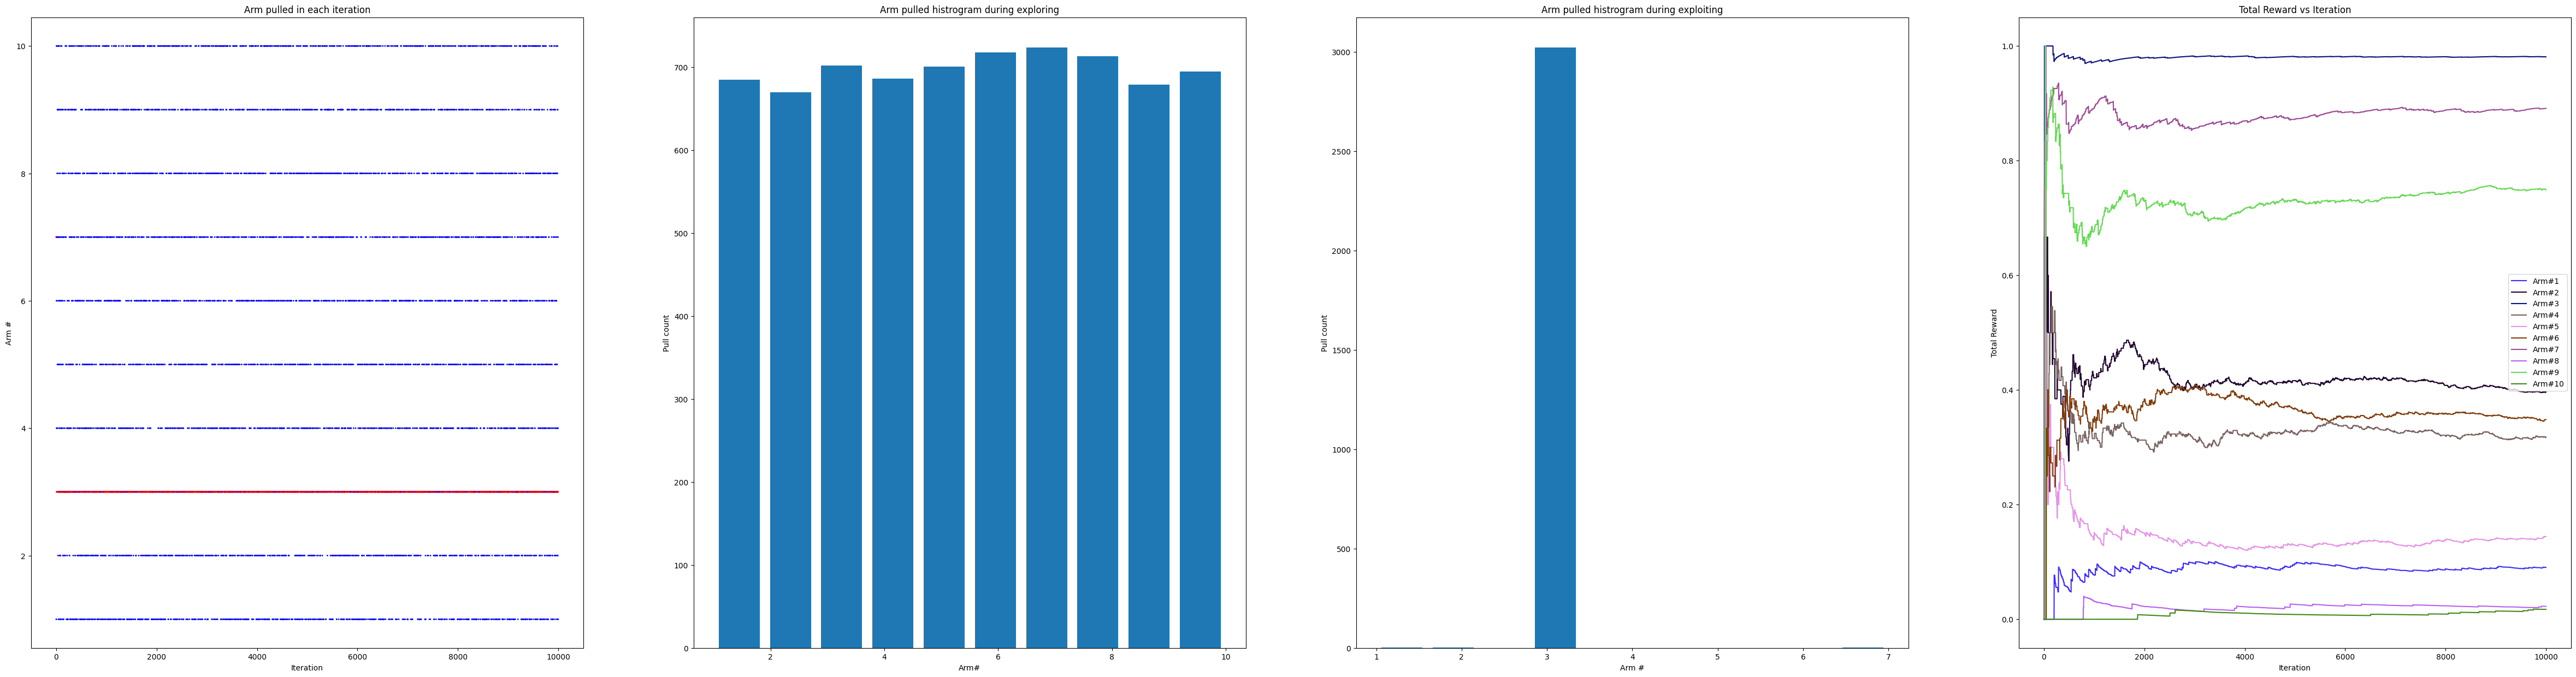

In [15]:
color_map = {'T': 'blue', 'F': 'red'}

fig, axs = plt.subplots(1, 4, figsize=(60, 15))
axs[0].scatter(df.index.to_list(),df['Arm'], color=df['Explore?'].map(color_map), s=1)
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Arm #")
axs[0].set_title("Arm pulled in each iteration")

axs[1].hist(df_explore['Arm'], rwidth=0.8)
axs[1].set_xlabel("Arm#")
axs[1].set_ylabel("Pull count")
axs[1].set_title("Arm pulled histrogram during exploring")

axs[2].hist(df_exploit['Arm'], rwidth=0.8)
axs[2].set_xlabel("Arm #")
axs[2].set_ylabel("Pull count")
axs[2].set_title("Arm pulled histrogram during exploiting")

# [axs[3].hist(df['Arm']) for i in range(df.columns.size)]
[axs[3].plot(df.index.to_list(), df[c], color = np.random.rand(3,), label=c) for c in df.columns[3:]]
axs[3].set_xlabel("Iteration")
axs[3].set_ylabel("Total Reward")
axs[3].set_title("Total Reward vs Iteration")
axs[3].legend()

plt.show()